# Herman Dávid Tamás
# Nyulak, fű és gazok populációmodell <img src="rabbitgrassweed/pics/frabbit.png"> <img src="rabbitgrassweed/pics/rabbit.png">

## Előszó

A "Nyulak, fű és gazok" egy NetLogoban készült ágens alapú modell saját programozású mesa implementációja, illetve továbbfejlesztése.
Ez a modell egy növényevőfaj és annak kétféle táplálékának populációinak együttélését modellezi háromféleképpen.
Az alapértelmezett modelltípus az eredeti modellt hivatott a lehető leghűbben implementálni, míg a "Bővített modell" típusban a növényevőfaj egyedeinek neme is van.

## A modelltípusok működési jellemzői

### Közös jellemzők

Mindkét modellben van egy növényevőfaj, amelyet nyulakkal reprezentálunk.
Ezek a nyulak egy olyan területen élnek, ahol fű és gazok nőhetnek valószínűségi alapon, amelyeknek különböző a tápértéke.
Továbbá minden egyednek van valamennyi energiája (továbbiakban energiapont, röviden EP), amely minden lépésben (a modell állapotváltozása) eggyel csökken, de evés által a megevett táplálék típusától függő paraméternyivel megnő. Ha elfogy az energiájuk, akkor meghalnak. Ezek mellett képesek is szaporodni, amennyiben egy megadott szint feletti energiapontjuk van, azonban ekkor az energiájuk megfeleződik. A modell egy lépésében a nyúl ágensek egy szomszédos cellába lépnek át, ahol a szomszédos cellák a Moore-féle szomszédokat jelenti az ágens aktuális cellájának kivételével, tehát a nyúl ágensek nem maradhatnak egy helyben.

Az energiapontról annyit érdemes tudni, hogy a program eggyel kevesebb energiaponttal dolgozik, mint ami egy állaton látható a vizualizációs alkalmazásban, ha rájuk tesszük a kurzort. Ez azt hivatott korrigálni, hogy a szaporodási küszöb és a kezdeti maximális EP paraméterek szigorú egyenlőtleséggel működnek. Ezen paraméterek csúszkái a kijelzett értékek szerint állíthatók. Tehát a felhasználónak az alkalmazás legalább 1 EP-t jelez. Az állatokra rátéve a kurzort látható egy "Layer: 1" érték is, ami réteget jelent és kötelező érték. A fű ágenseknél ez az érték 0 és ennek köszönhető, hogy csak az állatokon jelenik meg ez a jelzés.

Az eredeti modellben a fű és gazok mint "patchek" voltak a cellákba helyezve, míg ebben az implementációban ágensként.
Mindkét modelltípus esetén a füvet és a gazokat egy közös fű ágens kezeli, amennyiből annyi van, ahány cella. A fű ágenseknek két állapota van, kinőtt és lelegelt.
Fontos tulajdonság, hogy a cellákban nagyobb valószínűséggel nő ki fű, mint gazok. Ennek az az oka, hogy először az dől el, hogy gazok nőhetnek-e ki és utána, hogy fű, azonban ez felülírja gazokat, amennyiben bekövetkezik. Tehát, ha fű kinőhet a megadott valószínűség szerint, akkor fű nő ki függetlenül attól, hogy gazok kinőhetnek-e vagy sem. Ez a viselkedés az eredeti modellből származik.

A modell továbbfejlesztése céljából, lehetőség van egy ragadozófaj hozzáadásához, amelyet rókákkal reprezentálunk. A rókák alapértelmezetten ugyanúgy működnek, mint a nyulak, de természetesen a rókák a nyulakat eszik meg. A rókák rendelkeznek a nyulak paramétereivel.

A paraméterek sorrendben és alapértelmezett értékük:

<ul>
<li>A rács szélessége és magassága, ami csak a kód módosításával állítható. Ennek a vizualizációs alkalmazás korlátai az oka.
<br><i>30 x 30</i></li>
<li>Tórusz: Ha egy állat ágens a rács szélén van, akkor átléphetnek-e a szemben lévő szélre vagy sem.
<br><i>Igaz</i></li>
<li>Modelltípus, amely lehet az eredeti modell, vagy a "Bővített modell", amiben az állatoknak van neme.
<br><i>Nyulak, fű és gazok modell</i></li>
<li>A nyulak kezdeti száma.
<br><i>150</i></li>
<li>A rókák kezdeti száma.
<br><i>0</i></li>
<li>A nyulak fűből és gazokból nyert energiapont mennyisége.
<br><i>5 és 0</i></li>
<li>A rókák nyulakból nyert energiapont mennyisége.
<br><i>5</i></li>
<li>A nyulak és rókák maximális kezdeti energiapont mennyisége, eredetileg ez az érték nem volt változtatható.
<br><i>10 és 10</i></li>
<li>A nyulak és rókák szaporodási küszöbe. Legalább ennyi energiapontra van szüksége egy egyednek a szaporodáshoz.
<br><i>15 és 15</i></li>
<li>A fű és gazok kinövési valószínűsége százalékban. Az eredeti modellben ezrelékben, de a csúszkák ilyen sűrű beosztásű intervallumon pontatlanok.
<br><i>6, eredetileg 15 ezrelék, vagyis 1,5%</i></li>
<li>A nyulak csordába igyekezzenek-e szerveződni.
<br><i>Hamis</i></li>
<li>A rókák aktívan vadásszanak-e.
<br><i>Igaz</i></li>
<li>A vadászatot korlátozó kitevő. Lásd lejjebb!
<br><i><math xmlns="http://www.w3.org/1998/Math/MathML"><mo>-</mo><mn>0,5</mn></math></i></li>
<li>A random függvényeket szabályzó seed. A seed segítségével reprodukálhatóvá válnak a futtattások, de kikapcsolható.
<br><i>Igaz és 474</i></li>
</ul>

A vadászatot korlátozó kitevő azt jelenti, hogy annak a valószínűsége, hogy egy farkas aktívan vadászik $\text{energiapont}^{-|\text{kitevő}|}$. Tehát, ha a kitevő 0, akkor nincs korlátozás. Fontos megjegyezni, hogy a kitevő azért nem pozitív, mert különben a kód működéséből kifolyólag a valószínűség 100% lenne, mint 0 esetében. Szabad vadászat esetén jellemző a túlvadászat, ez volt a kitevő bevezetésének motivációja.

### Farkasok és bárányok

<ul>
<li>A legegyszerűbb modelltípus, amely az eredeti modellből lett közvetlenül implementálva.</li>
<li>Minden cellában a fű mindig ki van nőve.</li>
<li>A bárányoknak végtelen energiájuk van (nem változik).</li>
<li>A farkasok megadott valószínűséggel esznek meg egy bárányt abból a cellából amelyen ők is vannak.</li>
<li>Az egyedek megadott valószínűséggel hoznak világra egy utódot, amely utód az egyik szomszédos cellába kerül.</li>
</ul>

### Farkasok, bárányok és fű

<ul>
<li>Szintén az eredeti modellből implementálva.</li>
<li>A fentiek érvényesek az alábbiak mellett.</li>
<li>A bárányok energiája ugyanúgy változik, mint a farkasoké.</li>
<li>A lelegelt fű ágensek megadott számú lépés után nőnek ki újra.</li>
</ul>

### Bővített modell

<ul>
<li>Az általam bővített modelltípus.</li>
<li>Az állat ágenseknek van neme.</li>
<li>A szaporodáshoz a valószínűség mellett két különböző nemű egyed kell legyen egy közös cellában és mindkét szűlőnek "akarnia" kell.</li>
<li>Az új szaporodási feltételek miatt egy szülő szaporodási valószínűsége a paraméter gyöke, így a két szülő együtt adja ki a paramétert.</li>
</ul>

## Megfigyelések

A modell elemzés céljából legérdekesebb tulajdonsága a stabilitás, vagyis, hogy a modellben szereplő fajok kihalnak-e vagy sem.<br>
A fent leírt alapértelmezett paraméterek esetén, amelyek a fű valószínűsége és az újak kivételével az eredeti modellből származnak, jellemző a stabilitás. A rókákat érintő paraméterek úgy lettek beállítva, hogy 50 kezdeti róka esetén is stabil legyen a modell.

## A vizualizációs program

### Futattás

A modell vizualizációjáért a mesa_viz_tornado python csomag felelős (a Python tehát előfeltétele a futtatásnak), ami a mesa 2.4.0 verziójának telepítésekor automatikusan települ, azonban az ennél újabb verziók (3.0.0+) már nem használják, ezért a kompatibilitás érdekében közvetlenül importáltam a belőle szükséges elemeket.

A vizualizációs programot többféleképpen is el lehet indítani. Egyik lehetőség az ezen notebookkal egy mappában lévő run.py fálj futtatása, vagy a mappában megnyitott parancsorba azt írjuk be, hogy "mesa runserver" idézjelek nélkül.

Sajnálatos módon, csak Linux alatt ajánlott a futtatás, mert valamilyen ok folytán Windows alatt a mesa_viz_tornado által generált weboldalon nem jelennek meg rendesen az interaktív elemek, de ettől függetlenül minden működik. Azonban WSL-lel vagy virtuális géppel Windowson is hibátlanul futattható. Mindkét módszert Debian Linuxszal teszteltem. Én a WSL megoldást javaslom, mert a kiírt IP-címes URL működik (http://127.0.0.1:8521, amivel egyenértékű a <a href=http://localhost:8521>localhost:8521</a>) a virtuális gép esetével ellentétben, ahol a programtól és annak beállításaitól függ az IP-cím, vagy a virtuális gépen belül használjuk a programot.

### Kezelés

<img src="rabbitgrassweed/pics/viz_showcase.png" width=700>

A fenti ábrán egy az alapértelmezett paraméterekkel, kezdeti állapotban készült képernyőkép látható.

A weboldal alapértelmezett nyelve az angol, de a jobb felső sarokban lévő zászlóra kattintva a grafikonok jelmagyarázatának kivételével átállítható magyarra és akár vissza is. A bal felső sarokban a model neve látható, mellette a Leírás gombra kattintva a README.md egy rövidített, csak az oldal aktuális nyelvén lévő változata olvasható. A zászlótól balra látható az Indítás, a Léptetés és a Visszaállítás gombok, amelyek nevükhöz hűen működnek, de az Indítás gomb a Megállítás gombbá változik, ha fut a szimuláció.

A bal oldalon a modell paraméterei állíthatók be, középen a modellt vizualizáló négyzetrács látható, amely felett a rendes, Indítás gombbal való indított szimuláció sebessége allítható, amely alapértelmezett értéke 3 lépés/másodperc, azonban ez az ágensek számától függően változhat (például túlszaporodás esetén lassabb). A rács alatt két grafikon látható (az alsó nem fért a képre), amely közül a felső az egyedek számát ábrázolja fajonként, illetve nemenként a lépésszám függvényében. Az alsó grafikon a kinőtt fűágensek százalékos arányát ábrázolja szintén a lépésszám függvényében. A lejjebb lévő "Vizualizáció nélküli futtattás" szakaszban ugyanezen grafikonok láthatóak.

A nőstény farkasok narancssárgák, a hímek szürkék, a nőstény bárányok fehérek, a hímek feketék. Ennek a választásnak a következménye az, hogy az öröklött modelltípusokban minden farkas hím és minden bárány nőstény.

## Vizualizáció nélküli futtattás

Az alábbi cella futtattásával a modell alapértelmezett paramétereivel 100 lépés szimulálható és az adatokat egy pontosvesszővel elválasztott csv fájlba írható, amelyben tizedesvessző van, nem tizedespont. Igény szerint ez a df.to_csv sep és decimal paraméterrével megváltoztatható, illetve az első paraméter a fájlnév. A lépésszám a range(100)-ban a 100 átállításával változtatható meg. Én az 5000 vagy 10000 lépésszámot ajánlom, de ilyenkor a futtattás sok időbe telik.

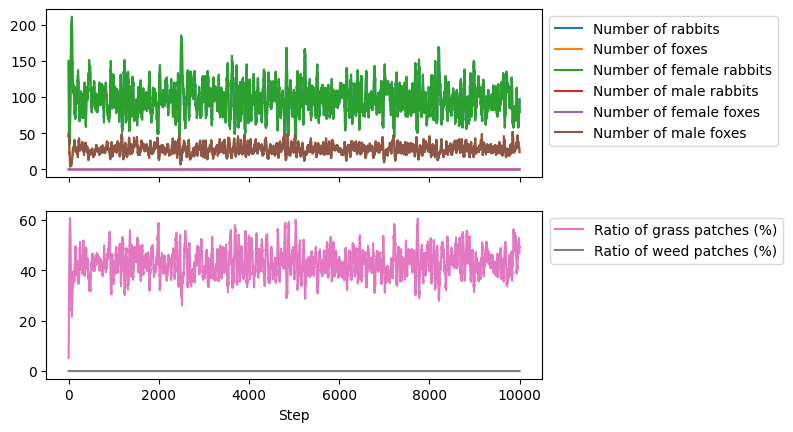

In [23]:
from rabbitgrassweed import RabbitGrassWeedModel


model = RabbitGrassWeedModel(30, 30, True, "Rabbits, Grass and Weeds model", 150, 50, 5, 0, 5, 10, 10, 15, 15, 6, 0, False, True, -0.5, True, 474)
for i in range(10000):
    model.step()
df = model.datacollector.get_model_vars_dataframe()
df.index.name = "Step"
ax1, ax2 = df.plot(subplots=[tuple(df.columns[:-2]), tuple(df.columns[-2:])], sharex=True)
ax1.legend(bbox_to_anchor=(1, 1))
ax2.legend(bbox_to_anchor=(1.5, 1))
df.to_csv("data.csv", sep=";", decimal=",")

## Hivatkozások

<ul>
<li>Wilensky, U. (1997). NetLogo Wolf Sheep Predation model. http://ccl.northwestern.edu/netlogo/models/WolfSheepPredation. Center for Connected Learning and Computer-Based Modeling, Northwestern University, Evanston, IL.</li>
<li><a href=https://upload.wikimedia.org/wikipedia/commons/c/c1/Flag_of_Hungary.svg>https://upload.wikimedia.org/wikipedia/commons/c/c1/Flag_of_Hungary.svg</a></li>
<li><a href=https://upload.wikimedia.org/wikipedia/commons/a/a5/Flag_of_the_United_Kingdom_(1-2).svg>https://upload.wikimedia.org/wikipedia/commons/c/c1/Flag_of_Hungary.svg</a></li>
<li><a href=https://mesa.readthedocs.io/stable/tutorials/visualization_tutorial.html>https://mesa.readthedocs.io/stable/tutorials/visualization_tutorial.html</a> (dead/halott link)</li>
<li><a href=https://stackoverflow.com/questions/66624802/javascript-start-function-when-innertext-changes>https://stackoverflow.com/questions/66624802/javascript-start-function-when-innertext-changes</a></li>
</ul>